<a href="https://colab.research.google.com/github/ashritakodali/coffee_quality_analysis/blob/Maggie/ML_Project_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! git clone https://github.com/ashritakodali/coffee_quality_analysis.git

Cloning into 'coffee_quality_analysis'...
remote: Enumerating objects: 72, done.
remote: Counting objects: 100% (72/72), done.
remote: Compressing objects: 100% (64/64), done.
remote: Total 72 (delta 19), reused 8 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (72/72), 208.53 KiB | 1.83 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("/content/coffee_quality_analysis/cleaned_data/FINAL_DATA.csv")

In [4]:
display(df)

,Country.of.Origin,Number.of.Bags,Bag.Weight,Harvest.Year,Grading.Date,Processing.Method,Aroma,Flavor,Aftertaste,Acidity,...,Clean.Cup,Sweetness,Moisture,Category.One.Defects,Quakers,Color,Category.Two.Defects,Expiration,Altitude,Species
0,Thailand,1,10,2020,2024-10-29,Washed/Wet,8.67,8.50,8.33,8.00,...,10.0,10.00,0.112,0,0,NaN,0,2025-10-29,1443.0,Arabica
1,Thailand,1,8,2025,2025-07-08,Natural/Dry,8.25,8.50,8.33,8.25,...,10.0,10.00,0.111,0,0,Green,0,2026-07-08,1450.0,Arabica
2,Thailand,1,7,2025,2025-10-02,Natural/Dry,8.42,8.42,8.17,8.17,...,10.0,10.00,0.097,0,0,Green,0,2026-10-02,1375.0,Arabica
3,Thailand,1,8,2025,2025-08-26,Natural/Dry,8.25,8.33,8.25,8.17,...,10.0,10.00,0.129,0,0,Yellow,0,2026-08-26,1200.0,Arabica
4,Thailand,1,7,2021,2025-10-02,Washed/Wet,8.33,8.25,8.08,8.08,...,10.0,10.00,0.095,0,0,Green,3,2026-10-02,1200.0,Arabica
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397,Vietnam,15,30,2025,2025-04-07,Natural/Dry,7.42,7.25,7.17,7.50,...,10.0,7.67,0.123,0,0,Green,0,2026-04-07,550.0,Robusta
398,Brazil,1,60,2024,2024-11-20,Washed/Wet,7.25,7.25,7.08,7.08,...,10.0,7.08,0.106,0,0,Yellow,2,2025-11-20,200.0,Robusta
399,Brazil,1,60,2024,2024-11-20,Natural/Dry,7.00,7.17,7.17,6.92,...,10.0,7.08,0.106,0,0,Brown,2,2025-11-20,232.0,Robusta
400,India,5,60,2023,2024-11-20,Washed/Wet,7.25,6.67,6.83,6.67,...,10.0,6.67,0.108,0,0,Yellow,0,2025-11-20,950.0,Robusta


Total number of defective beans: 197


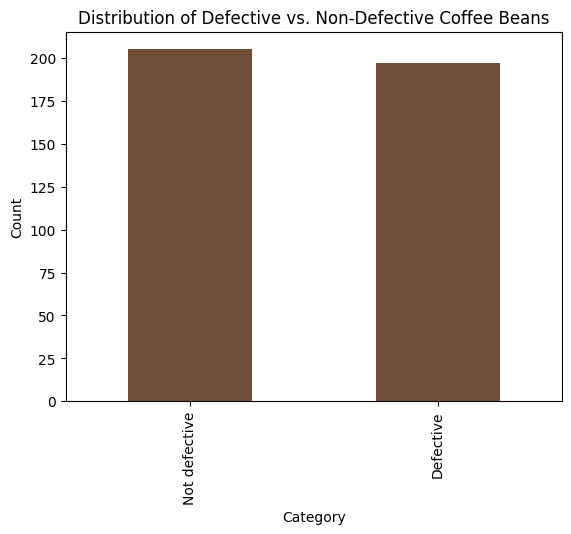

In [8]:
df['Defective'] = np.where(
    (df['Category.One.Defects'] > 0) | (df['Category.Two.Defects'] > 0),
    "Defective",
    "Not defective"
)
print("Total number of defective beans:", (df['Defective'] == "Defective").sum())

df['Defective'].value_counts().plot(kind='bar', color=['#6F4E37'])
plt.title("Distribution of Defective vs. Non-Defective Coffee Beans")
plt.xlabel("Category")
plt.ylabel("Count")
plt.show()


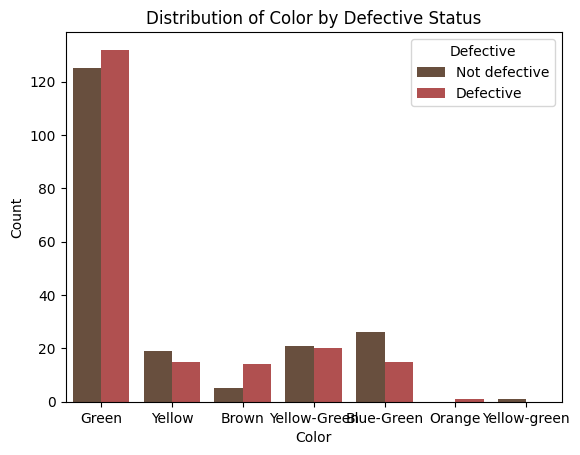

In [9]:
sns.countplot(x='Color', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Color by Defective Status")
plt.xlabel("Color")
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

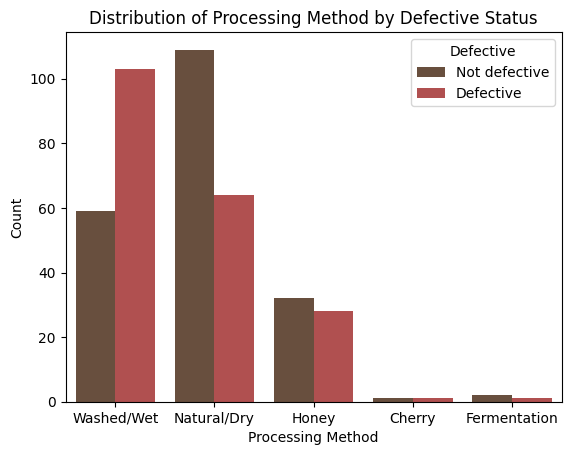

In [10]:
sns.countplot(x='Processing.Method', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Processing Method by Defective Status")
plt.xlabel("Processing Method")
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

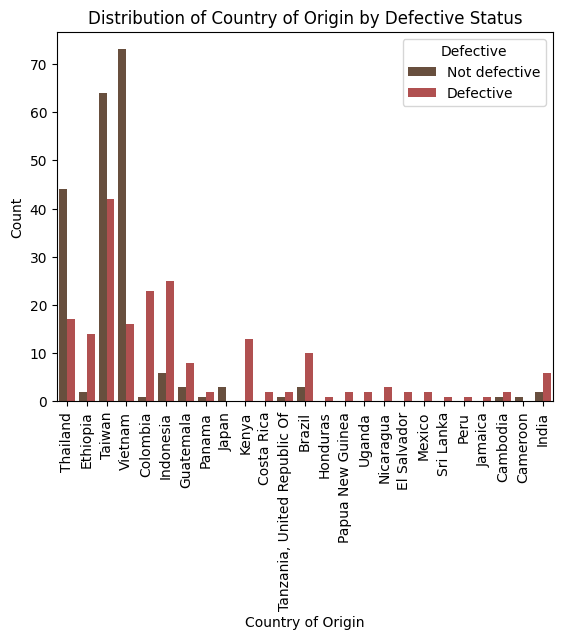

In [12]:
sns.countplot(x='Country.of.Origin', hue='Defective', data=df,
              palette=['#6F4E37', '#C04040'])
plt.title("Distribution of Country of Origin by Defective Status")
plt.xlabel("Country of Origin")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.legend(title="Defective")
plt.show()

In [15]:
defective = df[df['Defective']=='Defective']

In [16]:
defective.columns

Index(['Country.of.Origin', 'Number.of.Bags', 'Bag.Weight', 'Harvest.Year',
       'Grading.Date', 'Processing.Method', 'Aroma', 'Flavor', 'Aftertaste',
       'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean.Cup', 'Sweetness',
       'Moisture', 'Category.One.Defects', 'Quakers', 'Color',
       'Category.Two.Defects', 'Expiration', 'Altitude', 'Species',
       'Defective'],
      dtype='object')

In [18]:
defective_num = defective[['Number.of.Bags', 'Bag.Weight',
                               'Harvest.Year', 'Aroma', 'Flavor',
                               'Aftertaste', 'Acidity', 'Body',
                               'Balance', 'Uniformity', 'Clean.Cup',
                               'Sweetness','Moisture', 'Altitude']]

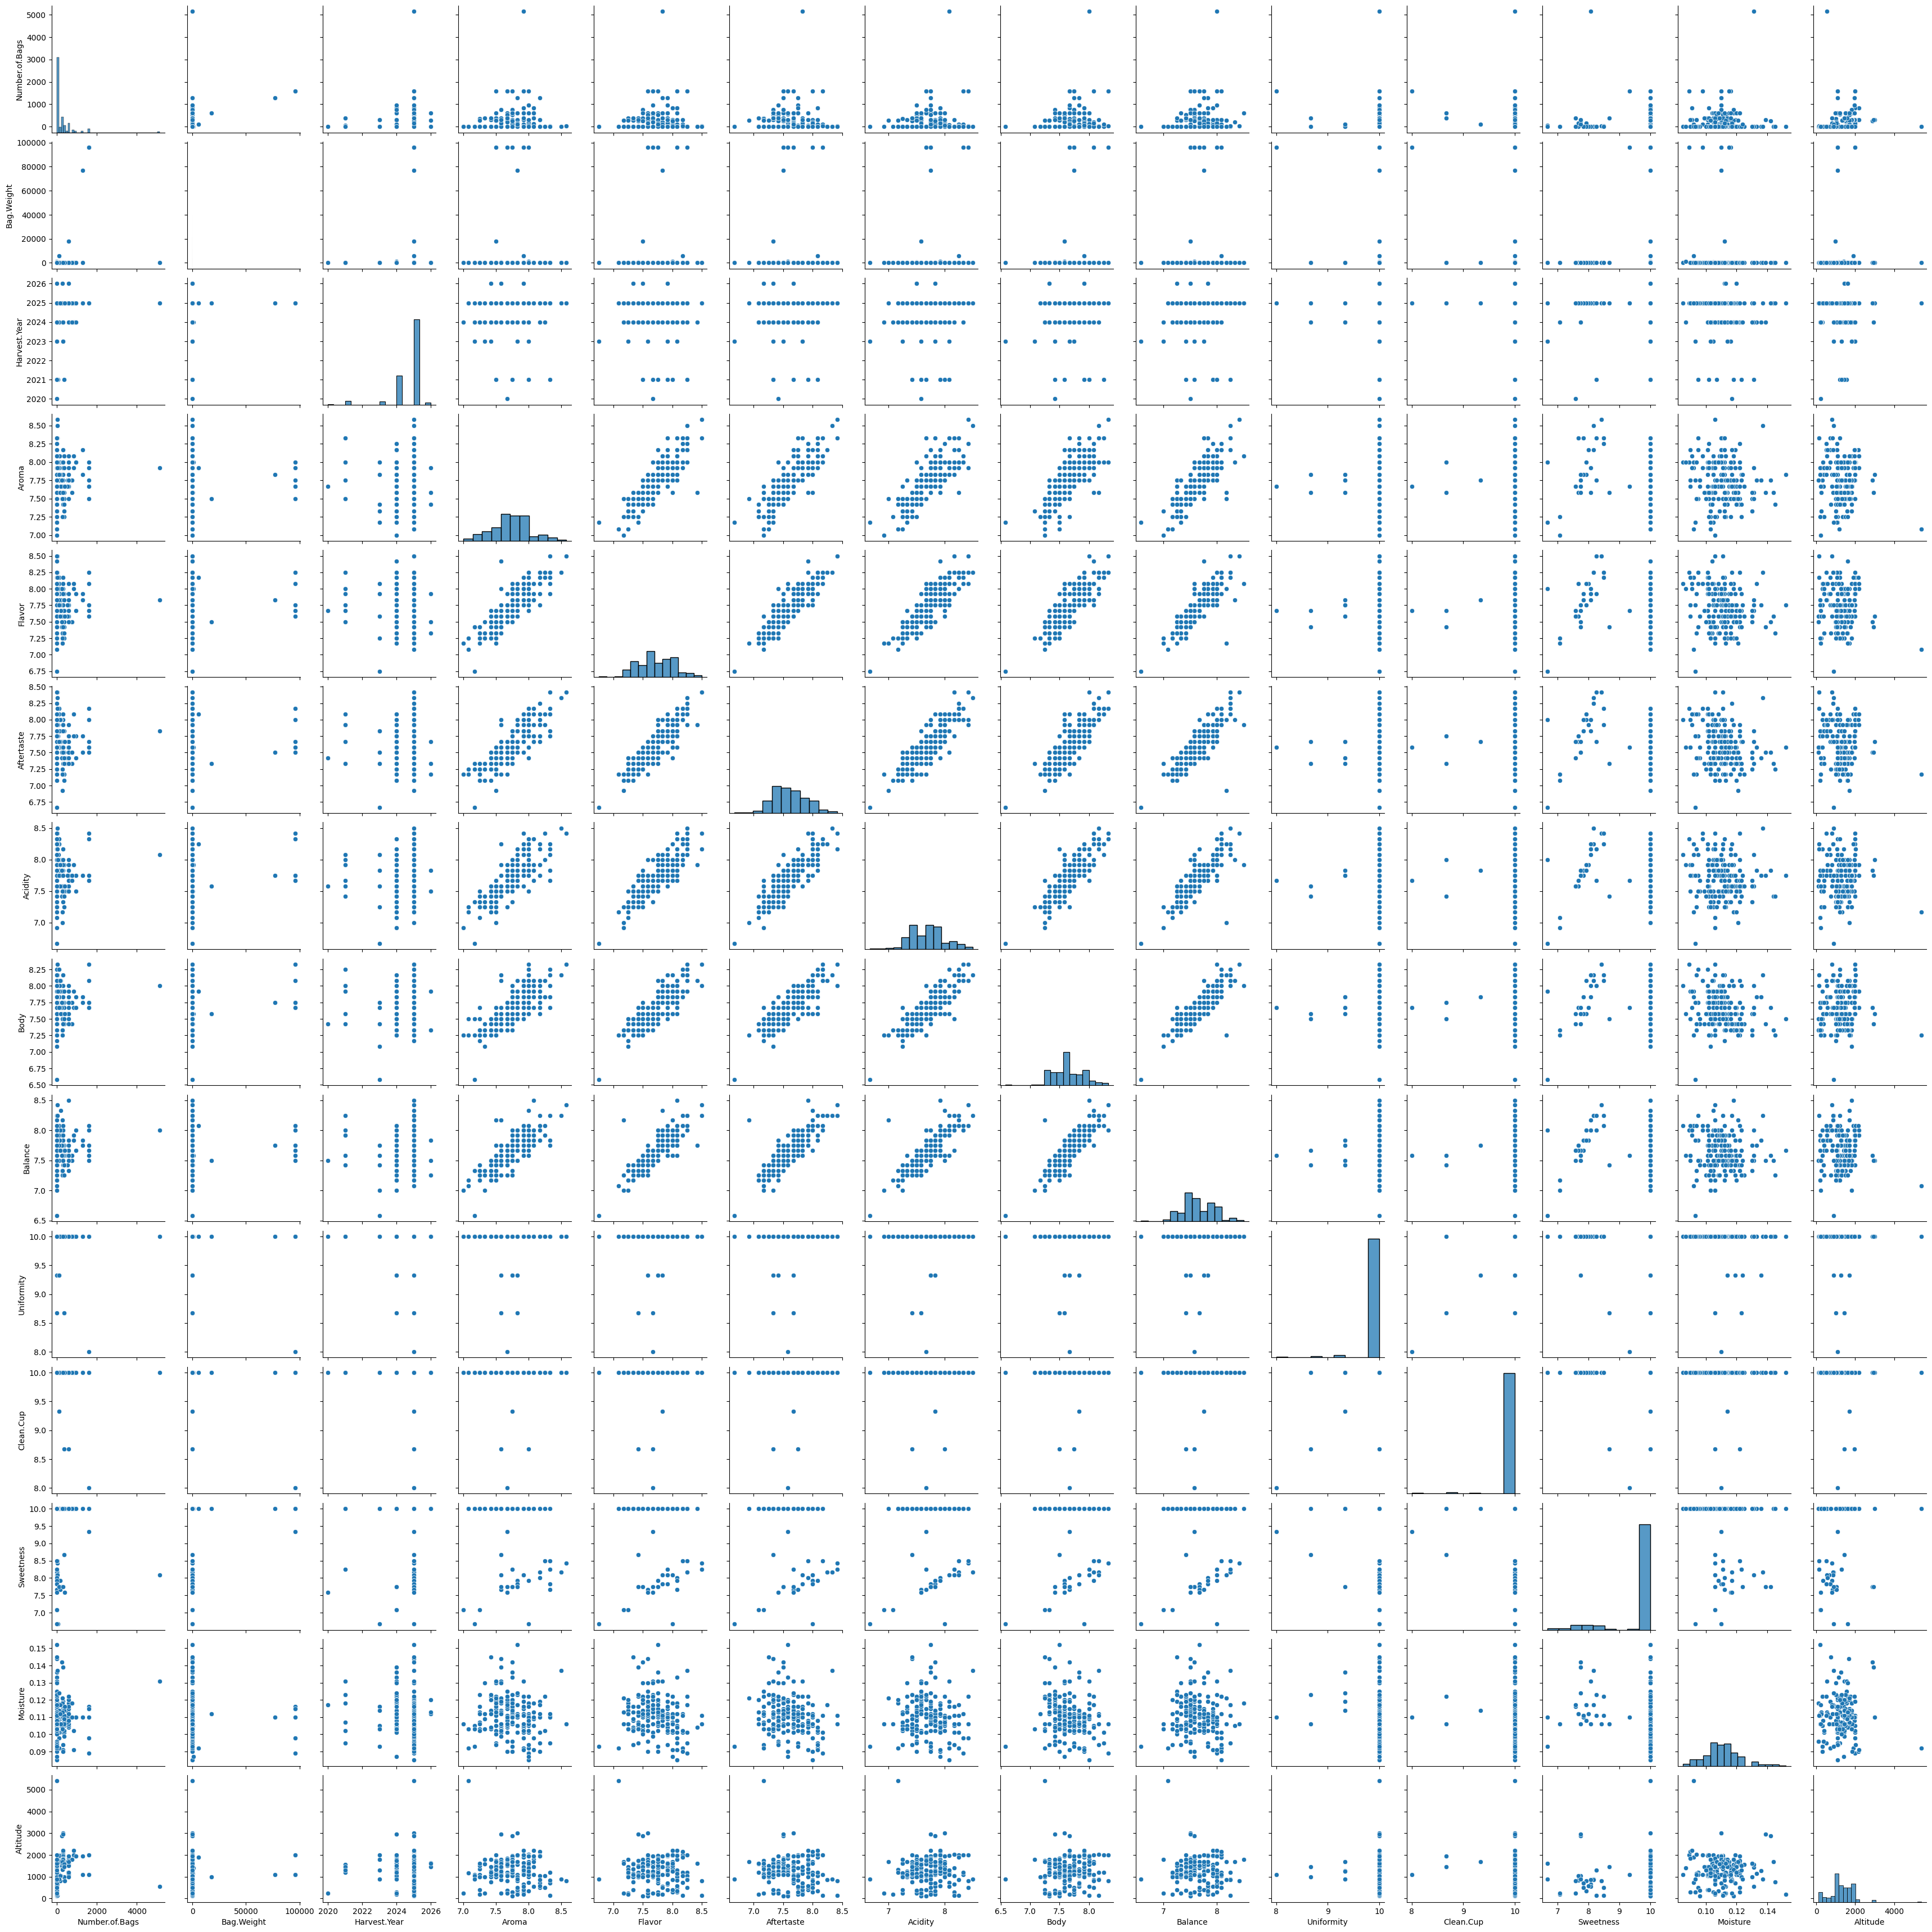

In [20]:
sns.pairplot(defective_num)

<Axes: >

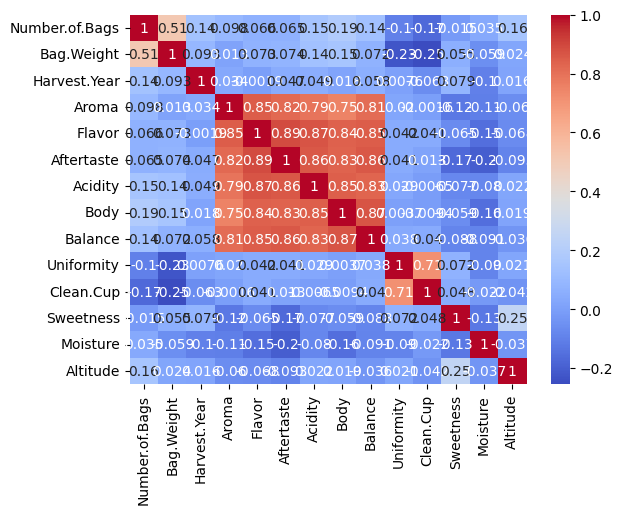

In [21]:
sns.heatmap(defective_num.corr(), annot=True, cmap='coolwarm')

In [30]:
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler
from random import sample
from numpy.random import uniform

def hopkins(X, sampling_size=0.1):
    if isinstance(X, pd.DataFrame):
        X = StandardScaler().fit_transform(X)
    n, d = X.shape
    m = int(sampling_size * n)
    nbrs = NearestNeighbors(n_neighbors=1).fit(X)

    rand_X = uniform(np.min(X, axis=0), np.max(X, axis=0), (m, d))
    sample_X = X[sample(range(n), m)]

    u_dist, _ = nbrs.kneighbors(rand_X, n_neighbors=1)
    w_dist, _ = nbrs.kneighbors(sample_X, n_neighbors=1)

    H = np.sum(u_dist) / (np.sum(u_dist) + np.sum(w_dist))
    return H

df_num = df[['Number.of.Bags', 'Bag.Weight', 'Category.One.Defects',
             'Category.Two.Defects',
                               'Harvest.Year', 'Aroma', 'Flavor',
                               'Aftertaste', 'Acidity', 'Body',
                               'Balance', 'Uniformity', 'Clean.Cup',
                               'Sweetness','Moisture', 'Altitude']]
df_num = df_num.loc[:, df_num.std() > 0]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_num.select_dtypes(include='number'))
X_unique = np.unique(X_scaled, axis=0)

H = hopkins(X_unique)
print(f"Hopkins statistic: {H}")

Hopkins statistic: 0.9999999986371235


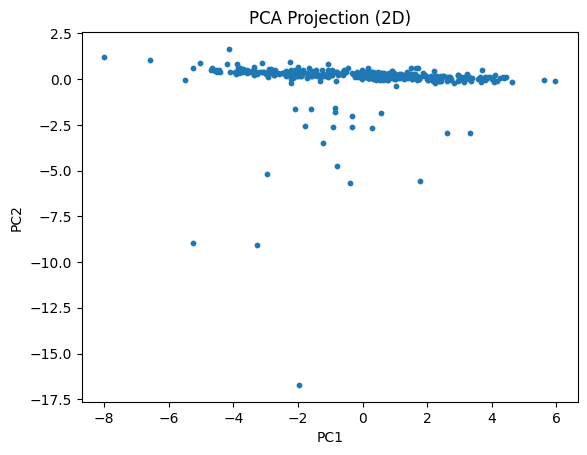

In [31]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_unique)
plt.scatter(X_pca[:,0], X_pca[:,1], s=10)
plt.title("PCA Projection (2D)")
plt.xlabel("PC1"); plt.ylabel("PC2")
plt.show()


In [32]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42).fit(X_scaled)
    score = silhouette_score(X_scaled, km.labels_)
    scores.append(score)
print(scores)


[np.float64(0.5003003917596099), np.float64(0.2938574745388539), np.float64(0.3064449354243231), np.float64(0.2223369009522643), np.float64(0.16377971464329696), np.float64(0.17128207265372683), np.float64(0.20199851049054054), np.float64(0.19973939280907022)]
